## Exploratory Data Analysis Notebook

Notebook context: Snippets of python script in visualizing data


The objective of this notebook is to summarize the frequent visualizataions that would be helpful for performaing an exploratory data analysis. 

 + Univariate Visualizations for numerical, categorical and text data
     * Histogram and Density Plots 
     * Barplots / Frequency Plots 
     * Pie Charts 
     * Missing Plot
     
 + Multivariate visualizations amongst numericals, categorical and text data
     * Correlation Plot
     * Scatterplot 
     * Box and Whisker Plots 
     * Time Series Plots 

 + For Text data
     * Word Cloud 
     * n-gram Frequency 
     
 + Spatial Data Visualization  

### Data Import

Following datasets from Kaggle are visualized

https://www.kaggle.com/c/house-prices-advanced-regression-techniques    
https://www.kaggle.com/c/spooky-author-identification/data    
https://www.kaggle.com/shrutimehta/zomato-restaurants-data     


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
# display plots in the notebook
%matplotlib inline 

In [3]:
#os.chdir("/Users/saiv/.kaggle/competitions/house-prices-advanced-regression-techniques/")
df_train = pd.read_csv("data/housingprices/train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Univariate Visualizations
#### Univariate Histogram

<Axes: xlabel='SalePrice', ylabel='Density'>

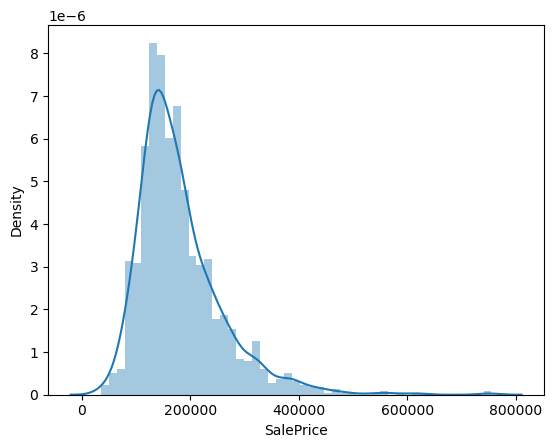

In [5]:
sns.distplot(df_train['SalePrice'])

#### skewness and kurtosis

In [6]:

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Univariate pie chart

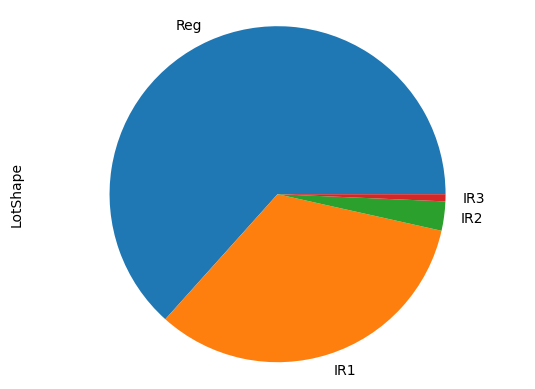

In [7]:

df_train['LotShape'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

In [ ]:
sns.barplot(

#### Univariate Frequency plot

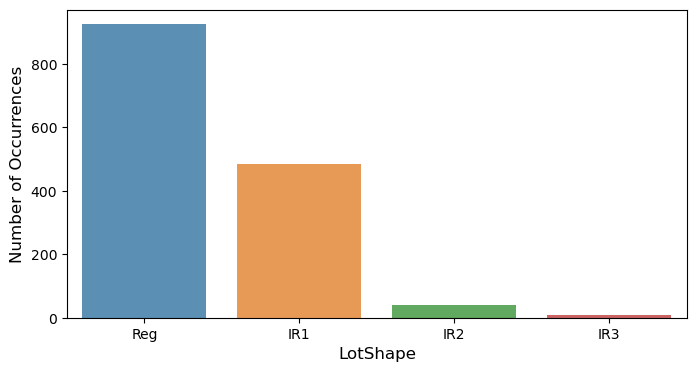

In [9]:

cnt_srs = df_train['LotShape'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LotShape', fontsize=12)
plt.show()

#### NA Missing plots

<Axes: >

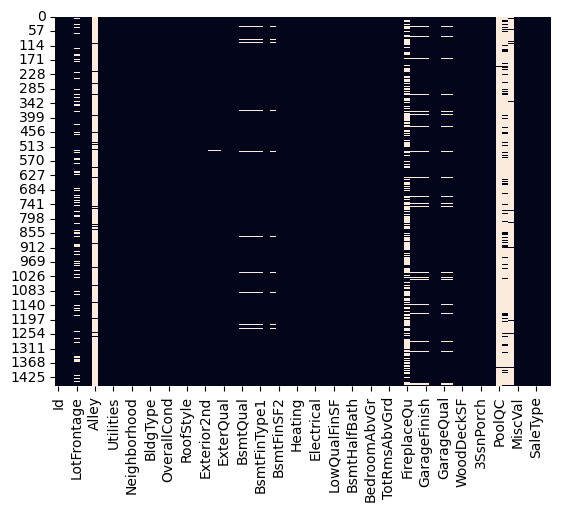

In [12]:
sns.heatmap(df_train.isnull(), cbar=False)

### Multivariate Visualizations

#### Scatter plot

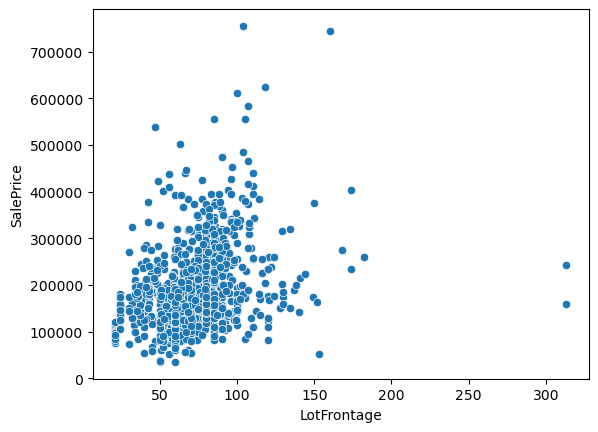

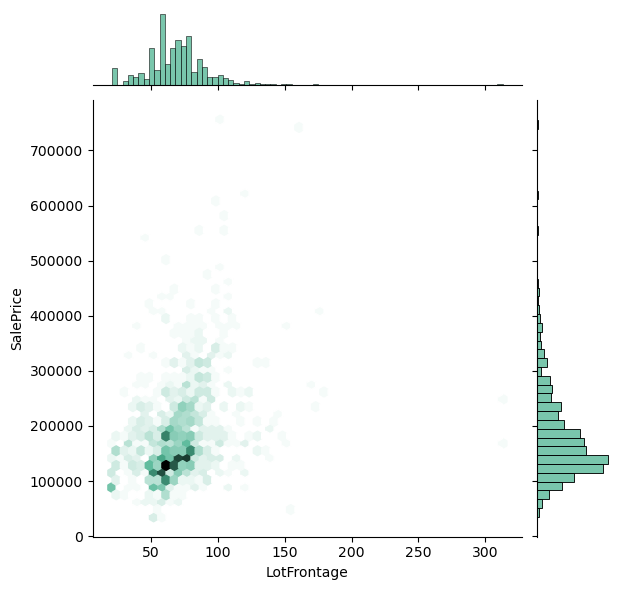

In [15]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data = df_train)
sns.jointplot(x="LotFrontage", y="SalePrice", kind="hex", color="#4CB391", data = df_train)

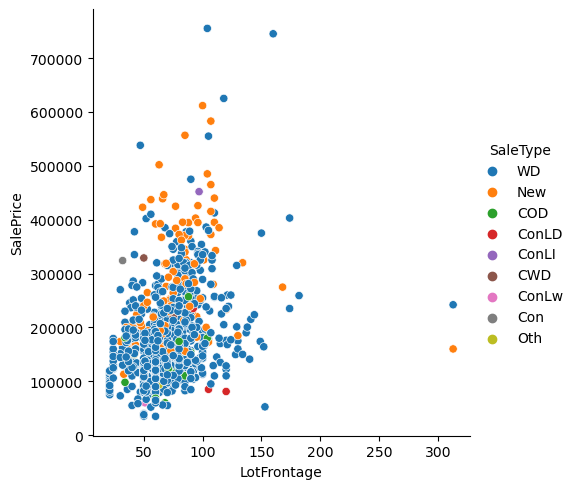

In [16]:
sns.relplot(x='LotFrontage', y='SalePrice', hue='SaleType', data=df_train)

#### Boxplot

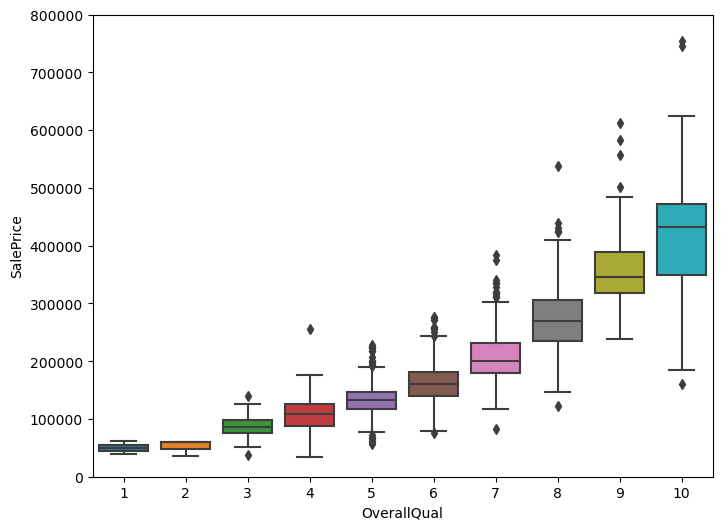

In [18]:

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### Correlation Plot

<Axes: >

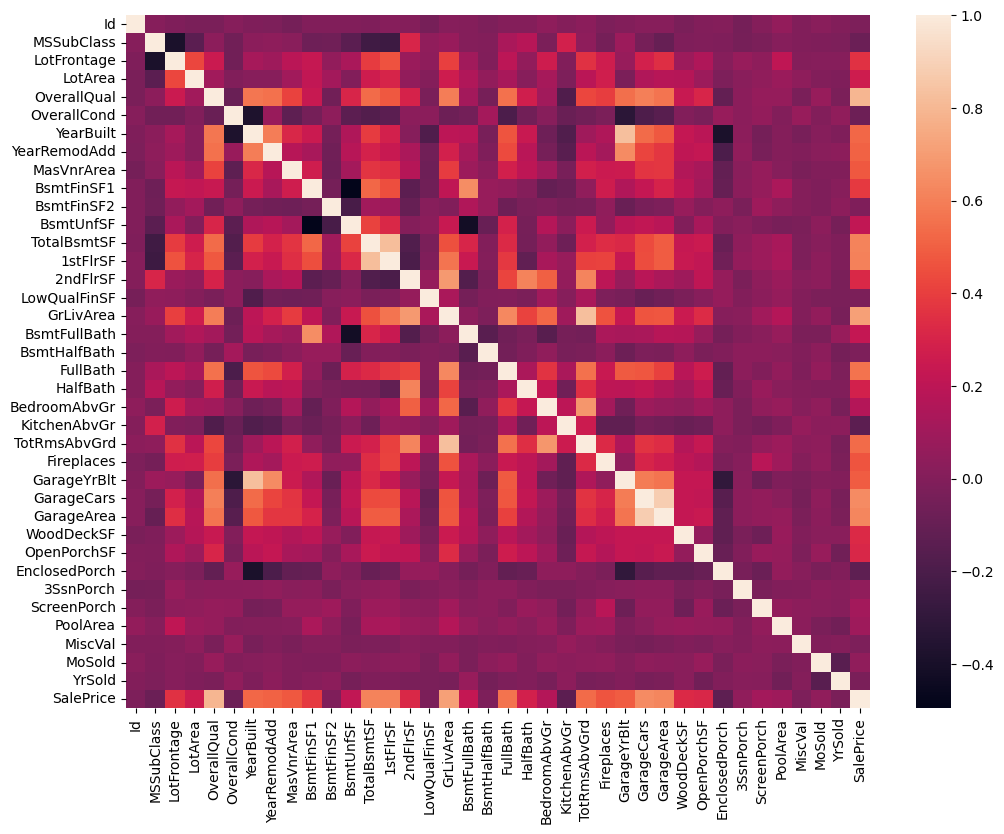

In [19]:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat)

#### Text Word Cloud data

In [22]:
#os.chdir("/Users/saiv/.kaggle/competitions/spooky-author-identification/")
df_train = pd.read_csv("data/spooky/train.csv")
df_train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


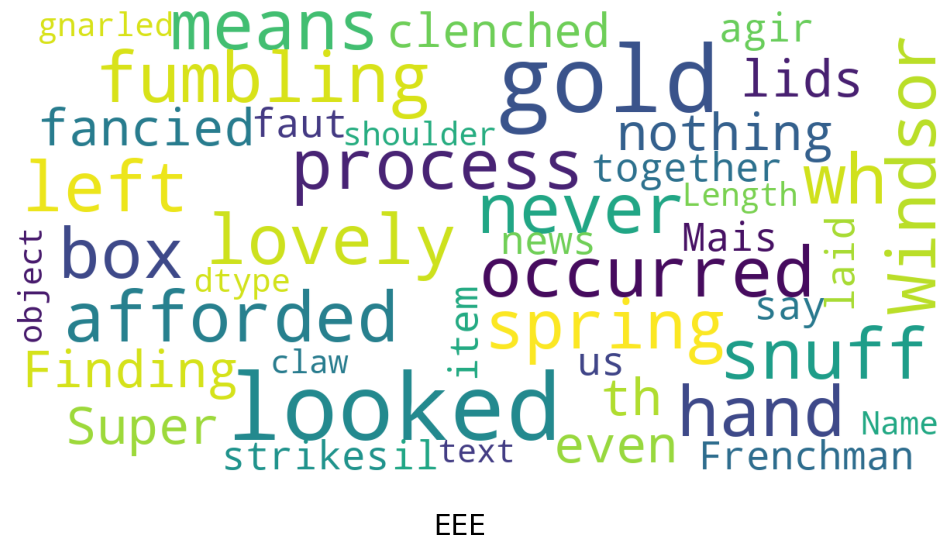

In [23]:
# Create a list of word
text = df_train['text'].astype(str).to_string()

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50000,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train['text'], "EEE")

#### Stacked Barplot -- Example

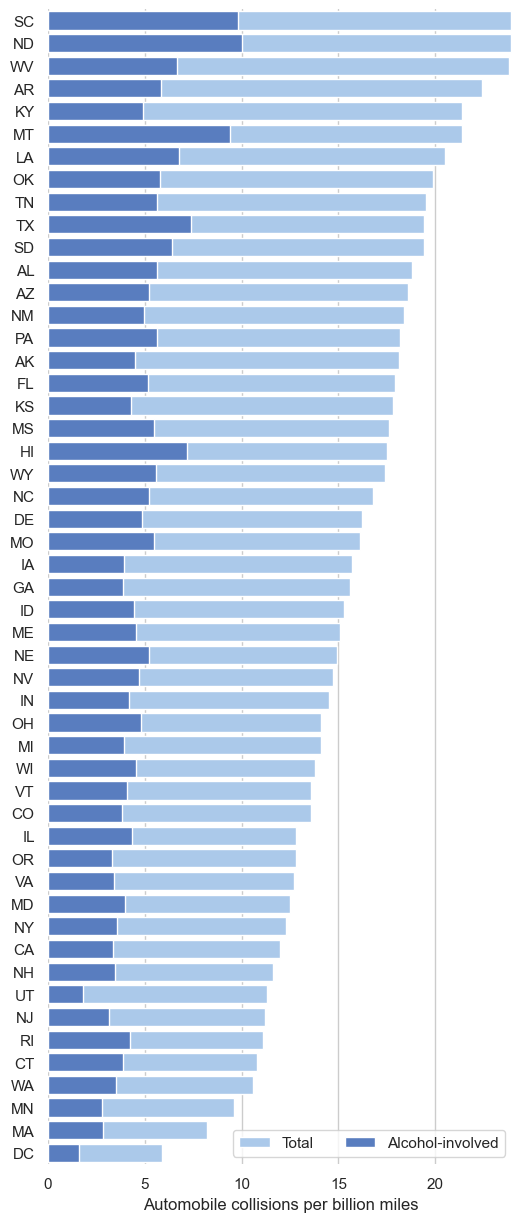

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
